**Outline:**

1. [Libraries and settings](#1-bullet)
2. [Analyze data](#2-bullet)
3. [Manipulate data](#3-bullet)
4. [Model and validate data](#4-bullet)
5. [Predictions](#5-bullet)

# 1. Libraries and settings <a class="anchor" id="1-bullet"></a> 

In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import math
import datetime
import os
import matplotlib.pyplot as plt

# 2. Analyze data <a class="anchor" id="2-bullet"></a> 
- parse raw data and generate csv file
- load data
- analyze data

**parse raw data and generate csv file**

In [2]:
# from utils import buildDataset

In [3]:
# # parse raw data and create csv file
# strategy = "./defaultStrategy.txt"
# output = "./defaultOutputs.txt"
# csvfile = "./defaultStrategy.csv"
# default = True   # whether this is default strategy or generated strategies
# createCSV = True # whether to write parsed data to csv. 
#                  # Set to True only if this is the 1st time parsing
# df = buildDataset.parseRawData(strategy, output, csvfile, 
#                                default=default, createCSV=createCSV)

In [4]:
csvfile = "./defaultStrategy.csv"
df = pd.read_csv(csvfile)

In [5]:
# show data info
df.info()

# number of different designs
numDesign = df.loc[len(df) - 1, 'design'] + 1
print('\nnumber of different designs: ', numDesign)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   design          2795 non-null   int64  
 1   size            2795 non-null   float64
 2   offset          2795 non-null   float64
 3   mazeEndIter     2795 non-null   float64
 4   DRCCost         2795 non-null   float64
 5   MarkerCost      2795 non-null   float64
 6   FixedShapeCost  2795 non-null   float64
 7   Decay           2795 non-null   float64
 8   ripupMode       2795 non-null   object 
 9   followGuide     2795 non-null   bool   
 10  DRC             2795 non-null   int64  
dtypes: bool(1), float64(7), int64(2), object(1)
memory usage: 221.2+ KB

number of different designs:  43


In [6]:
df.head()

,design,size,offset,mazeEndIter,DRCCost,MarkerCost,FixedShapeCost,Decay,ripupMode,followGuide,DRC
0,0,7.0,0.0,3.0,8.0,0.0,8.0,0.95,ALL,True,10178
1,0,7.0,-2.0,3.0,8.0,8.0,8.0,0.95,ALL,True,569
2,0,7.0,-5.0,3.0,8.0,8.0,8.0,0.95,ALL,True,499
3,0,7.0,0.0,8.0,8.0,32.0,16.0,0.95,DRC,False,1
4,0,7.0,-1.0,8.0,8.0,32.0,16.0,0.95,DRC,False,0


In [7]:
df.tail()

,design,size,offset,mazeEndIter,DRCCost,MarkerCost,FixedShapeCost,Decay,ripupMode,followGuide,DRC
2790,42,7.0,-2.0,64.0,512.0,512.0,800.0,0.999,DRC,False,0
2791,42,7.0,-3.0,64.0,512.0,512.0,800.0,0.999,DRC,False,0
2792,42,7.0,-4.0,64.0,512.0,512.0,800.0,0.999,DRC,False,0
2793,42,7.0,-5.0,64.0,512.0,512.0,800.0,0.999,DRC,False,0
2794,42,7.0,-6.0,64.0,512.0,512.0,800.0,0.999,DRC,False,0


In [8]:
df.describe()

,design,size,offset,mazeEndIter,DRCCost,MarkerCost,FixedShapeCost,Decay,DRC
count,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000
mean,21.000000,6.723077,-2.830769,17.246154,107.815385,116.430769,387.938462,0.967462,1067.929517
std,12.411894,0.984792,1.981568,17.956169,148.921949,143.553323,348.503444,0.022260,9077.283491
min,0.000000,3.000000,-6.000000,3.000000,8.000000,0.000000,8.000000,0.950000,0.000000
25%,10.000000,7.000000,-5.000000,8.000000,8.000000,32.000000,32.000000,0.950000,0.000000
50%,21.000000,7.000000,-3.000000,8.000000,32.000000,32.000000,400.000000,0.950000,0.000000
75%,32.000000,7.000000,-1.000000,16.000000,128.000000,128.000000,800.000000,0.990000,0.000000
max,42.000000,7.000000,0.000000,64.000000,512.000000,512.000000,800.000000,0.999000,177521.000000


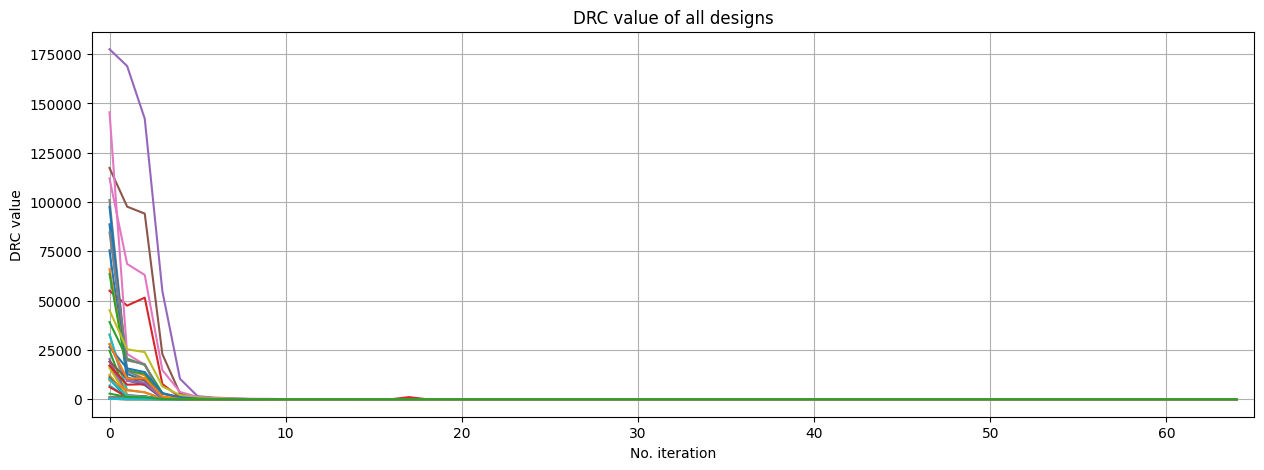

In [9]:
plt.figure(figsize=(15, 5));

for i in range(numDesign):
    plt.plot(df[df.design == i].DRC.values)
plt.title('DRC value of all designs')
plt.xlabel('No. iteration')
plt.ylabel('DRC value')
plt.xlim([-1, 65])
plt.grid()
plt.show()

In [10]:
designSize = len(df[df['design'] == 0])
numDesign = int(len(df)/designSize)
print(f"There are {numDesign} designs in total, each contains {designSize} DRC sequences")

There are 43 designs in total, each contains 65 DRC sequences


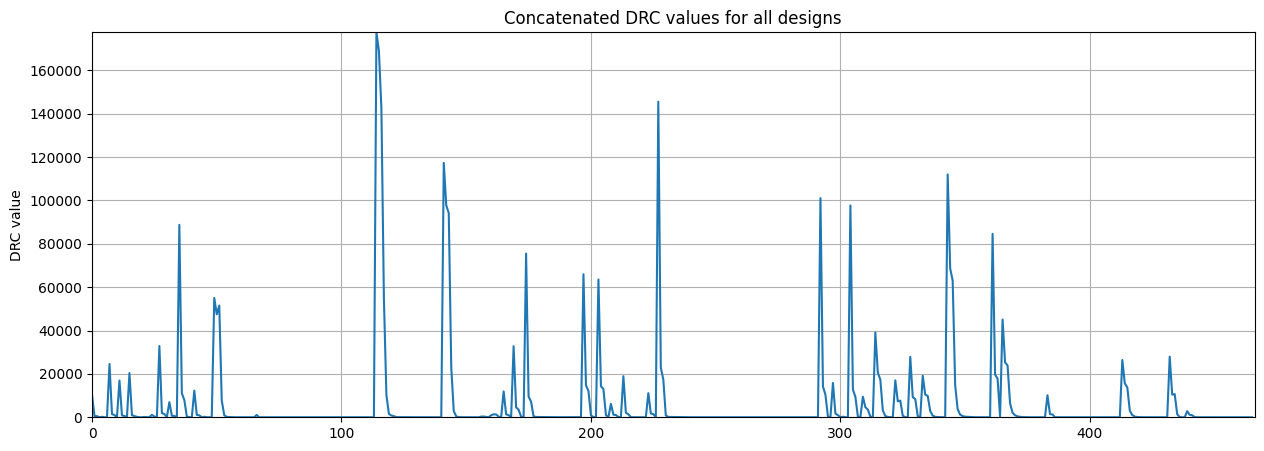

In [11]:
drcValues = np.delete(df['DRC'].to_numpy(), np.where(df['DRC'].to_numpy() == 0))
plt.figure(figsize=(15, 5));
plt.plot(drcValues)

plt.title(f'Concatenated DRC values for all designs')
plt.ylabel('DRC value')
plt.xlim([0, len(drcValues)])
plt.ylim([0, max(drcValues)])
plt.grid()
plt.show()

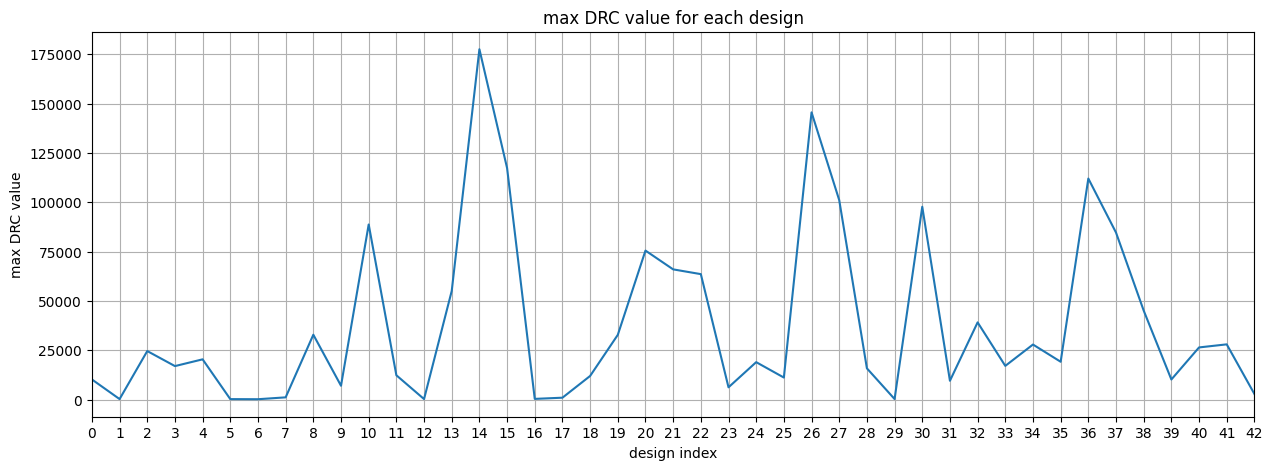

In [12]:
plt.figure(figsize=(15, 5));
plt.plot(df.DRC.values[::designSize])

plt.title(f'max DRC value for each design')
plt.xlabel('design index')
plt.xticks(np.arange(numDesign))
plt.ylabel('max DRC value')
plt.xlim([0, numDesign - 1])
plt.grid()
plt.show()

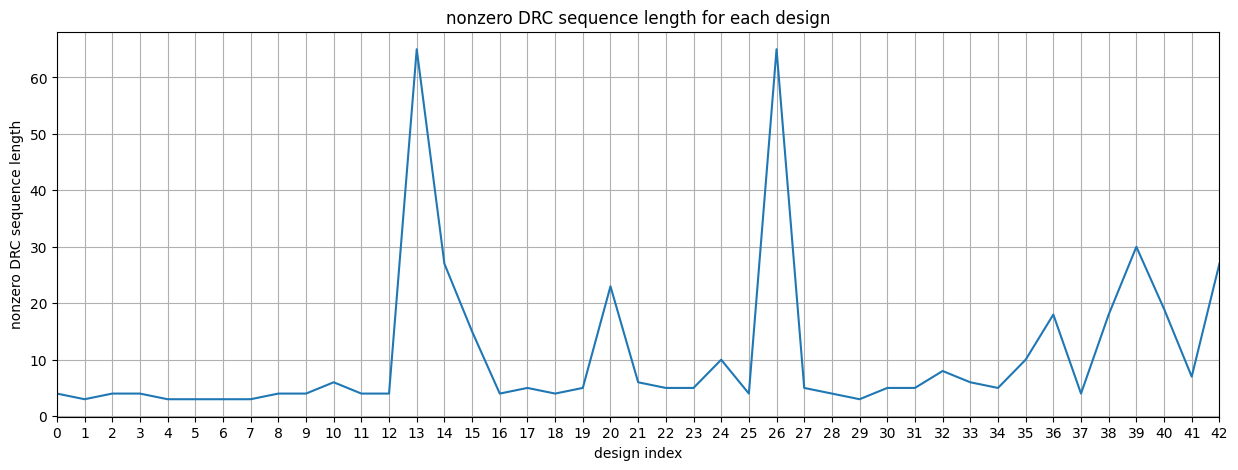

In [13]:
plt.figure(figsize=(15, 5));
# get DRC sequence length for each design
length = [sum(df[df['design'] == i].DRC.values != 0) for i in range(numDesign)]
plt.plot(length)

plt.title(f'nonzero DRC sequence length for each design')
plt.xlabel('design index')
plt.xticks(np.arange(numDesign))
plt.ylabel('nonzero DRC sequence length')
plt.xlim([0, numDesign - 1])
plt.grid()
plt.show()

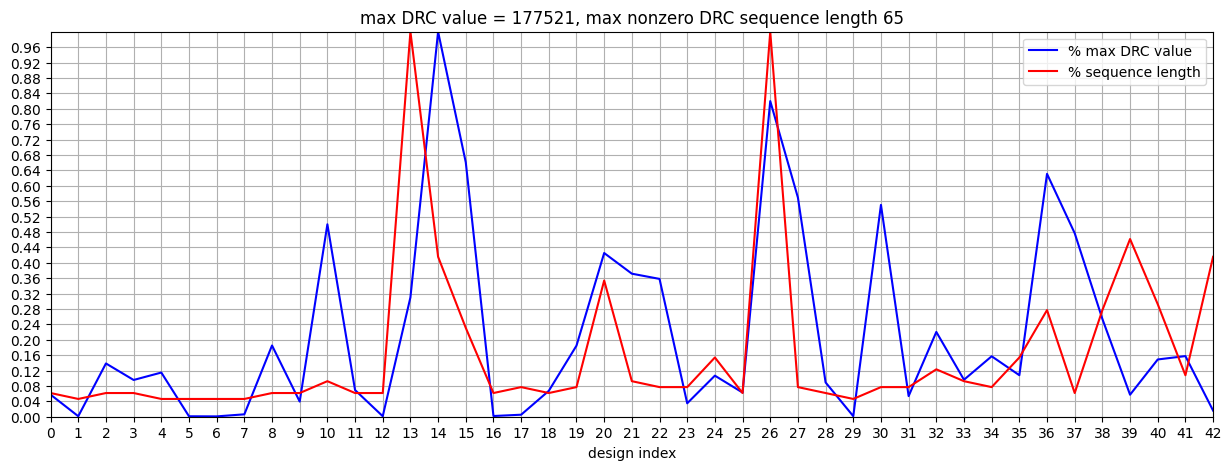

In [14]:
plt.figure(figsize=(15, 5));
maxDRC = max(df.DRC.values[::designSize])
plt.plot(df.DRC.values[::designSize] / maxDRC, 
         '-b', label='% max DRC value')

maxLen = max(length)
plt.plot(length / maxLen, '-r', label='% sequence length')

plt.title(f'max DRC value = {maxDRC}, max nonzero DRC sequence length {maxLen}')
plt.xlabel('design index')
plt.xticks(np.arange(numDesign))
plt.yticks(np.arange(25)/25)
plt.xlim([0, numDesign - 1])
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# 3. Manipulate data <a class="anchor" id="3-bullet"></a> 
- choose a specific stock and drop feature volume
- split train and test sets
- normalize stock data
- window sliding

**for each design, drop DRC sequences whose DRC = 0 (except for the first 0 sequence). Then, drop design, and size columns**

In [15]:
csvfile = "./defaultStrategy.csv"
df = pd.read_csv(csvfile)

In [16]:
from sklearn.preprocessing import MinMaxScaler

# for each design, drop 2nd to nth DRC sequence whose DRC = 0
def preprocessing(df: pd.core.frame.DataFrame, dropCols: list, norm: list) -> pd.core.frame.DataFrame:
    """For each design, normalize DRC values to [0, 1],
    drop the 2nd to nth DRC sequences whose DRC = 0. 
    For the whole dataset, replace ripupMode and followGuide to numeric values,
    drop columns,
    and normalize each coefficient column to [-1, 1]"""
    # design-wise operations: DRC operation and drop-off
    design = list(set(df.design.values))
    for i in design:
        # drop DRC sequences
        index = df[df['design'] == i].index[df[df['design'] == i].DRC.values == 0][1:]
        df = df.drop(list(index))
        # normalize DRC values
        maxValue = max(df[df['design'] == i].DRC.values)
        for x in list(df[df['design'] == i].index):
            if df.at[x, 'DRC'] == 0:
                break
            df.at[x, 'DRC'] = float(df.loc[x, 'DRC'] / maxValue)
        # print(f"design {i} data: {df[df['design'] == i]}")
    # dataset-wise operations: replace non-numerical values
    # ripupMode: ALL->0, DRC->1, NEARDRC->2
    # followGuide: True->1, False->0
    df.replace('ALL', 0, inplace=True)
    df.replace('DRC', 0.5, inplace=True)
    df.replace('NEARDRC', 1, inplace=True)
    df.replace(True, 1, inplace=True)
    df.replace(False, 0, inplace=True)
    # for i in design:
    #     print(f"design {i} data: {df[df['design'] == i]}")
    # drop columns
    df = df.drop(columns=dropCols)
    # for i in range(len(df)):
    #     print(f"index {i}: {df.iloc[i, :]}")
    # normalize coefficients
    for column in norm:
        sc = MinMaxScaler(feature_range=(-1, 1))
        df[column] = sc.fit_transform(df[column].to_numpy().reshape(-1, 1))
        # print(f"column {column}, df \n{df}\n\n")
    return df

In [17]:
drop = ['design', 'size']
norm = ['offset', 'mazeEndIter', 'DRCCost', 'MarkerCost', 'FixedShapeCost', 'Decay']
# norm = ['offset', 'mazeEndIter', 'DRCCost', 'FixedShapeCost', 'Decay']
df = preprocessing(df.copy(), drop, norm)

/tmp/ipykernel_57922/3051967182.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.05590489290626842' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[x, 'DRC'] = float(df.loc[x, 'DRC'] / maxValue)


In [18]:
df

,offset,mazeEndIter,DRCCost,MarkerCost,FixedShapeCost,Decay,ripupMode,followGuide,DRC
0,1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.0,0.0,1,1.000000
1,0.333333,-1.000000,-1.000000,-0.96875,-1.000000,-1.0,0.0,1,0.055905
2,-0.666667,-1.000000,-1.000000,-0.96875,-1.000000,-1.0,0.0,1,0.049027
3,1.000000,-0.836066,-1.000000,-0.87500,-0.979798,-1.0,0.5,0,0.000098
4,0.666667,-0.836066,-1.000000,-0.87500,-0.979798,-1.0,0.5,0,0.000000
...,...,...,...,...,...,...,...,...,...
2753,-0.666667,-0.836066,-1.000000,-0.87500,-0.818182,-1.0,1.0,0,0.000355
2754,-1.000000,-0.836066,-0.904762,-0.87500,-0.818182,-1.0,0.5,0,0.000355
2755,0.333333,-0.836066,-1.000000,-0.87500,-0.818182,-1.0,0.0,0,0.000355
2756,1.000000,-0.836066,-0.777778,-0.75000,-0.818182,-1.0,0.5,0,0.000355


In [19]:
df.columns

Index(['offset', 'mazeEndIter', 'DRCCost', 'MarkerCost', 'FixedShapeCost',
       'Decay', 'ripupMode', 'followGuide', 'DRC'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 0 to 2757
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   offset          507 non-null    float64
 1   mazeEndIter     507 non-null    float64
 2   DRCCost         507 non-null    float64
 3   MarkerCost      507 non-null    float64
 4   FixedShapeCost  507 non-null    float64
 5   Decay           507 non-null    float64
 6   ripupMode       507 non-null    float64
 7   followGuide     507 non-null    int64  
 8   DRC             507 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 55.8 KB


In [21]:
df.describe()

,offset,mazeEndIter,DRCCost,MarkerCost,FixedShapeCost,Decay,ripupMode,followGuide,DRC
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,0.195266,-0.798105,-0.886290,-0.813733,-0.728010,-0.817252,0.367850,0.254438,0.136365
std,0.663202,0.343097,0.344126,0.328450,0.604718,0.555922,0.255941,0.435975,0.302593
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,-0.333333,-1.000000,-1.000000,-0.968750,-1.000000,-1.000000,0.000000,0.000000,0.000055
50%,0.333333,-0.836066,-1.000000,-0.875000,-0.979798,-1.000000,0.500000,0.000000,0.000394
75%,0.666667,-0.836066,-0.968254,-0.875000,-0.939394,-1.000000,0.500000,1.000000,0.053815
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df['offset'].values

array([ 1.        ,  0.33333333, -0.66666667,  1.        ,  0.66666667,
        1.        ,  0.33333333, -0.66666667,  1.        ,  1.        ,
        0.33333333, -0.66666667,  1.        ,  0.66666667,  1.        ,
        0.33333333, -0.66666667,  1.        ,  0.66666667,  1.        ,
        0.33333333, -0.66666667,  1.        ,  1.        ,  0.33333333,
       -0.66666667,  1.        ,  1.        ,  0.33333333, -0.66666667,
        1.        ,  1.        ,  0.33333333, -0.66666667,  1.        ,
        1.        ,  0.33333333, -0.66666667,  1.        ,  0.66666667,
        1.        ,  0.33333333, -0.66666667,  1.        ,  0.66666667,
        1.        ,  0.33333333, -0.66666667,  1.        ,  0.66666667,
        0.33333333,  0.        ,  1.        ,  0.33333333, -0.66666667,
        1.        ,  0.66666667,  1.        ,  0.33333333, -0.66666667,
        1.        ,  0.66666667,  1.        ,  0.33333333, -0.66666667,
        1.        ,  0.66666667,  0.33333333,  0.        , -0.33

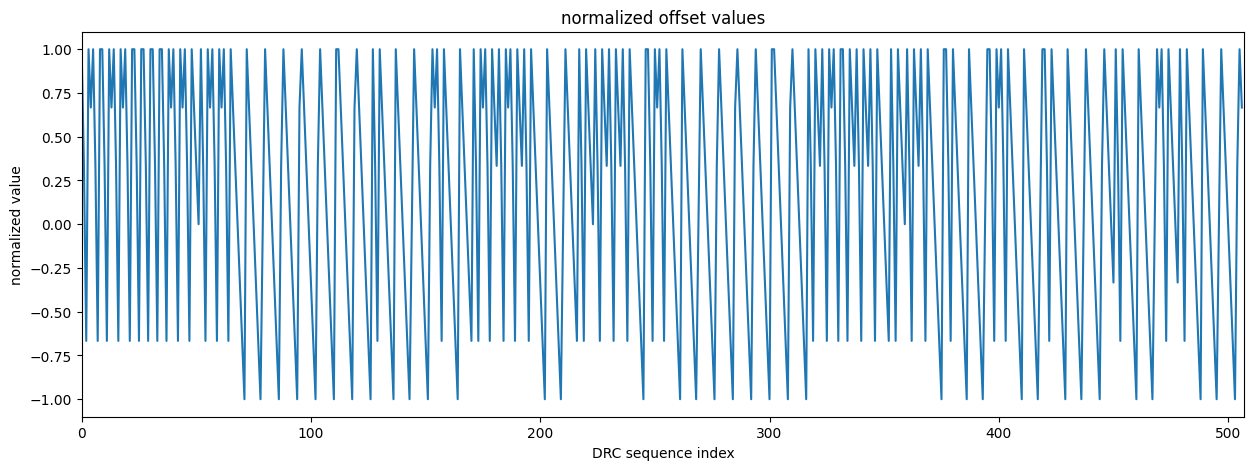

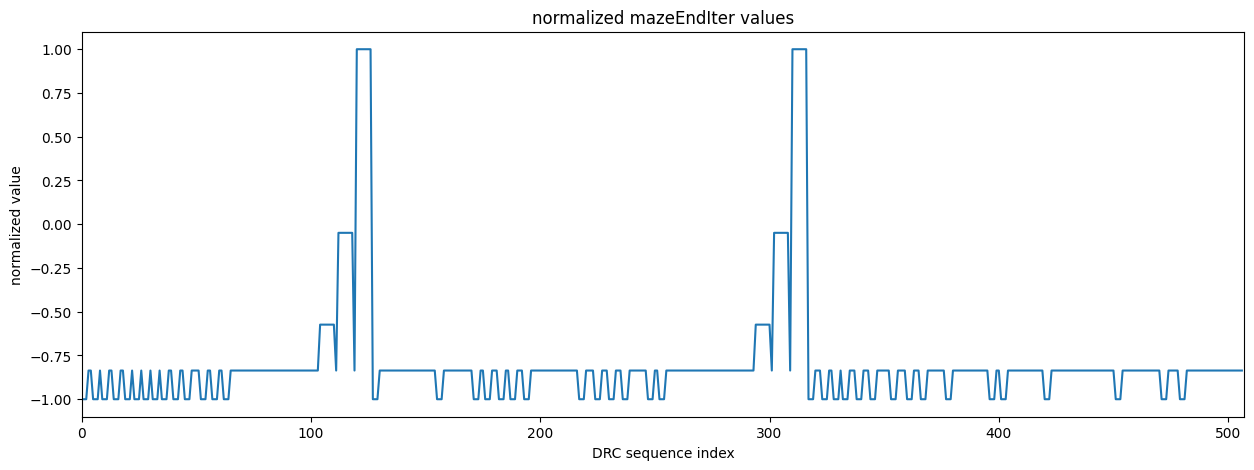

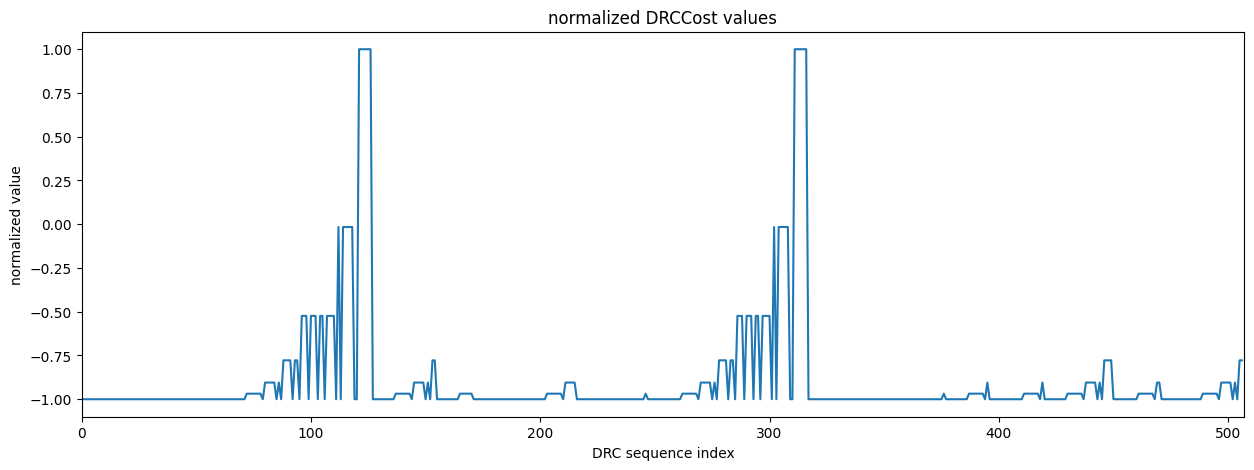

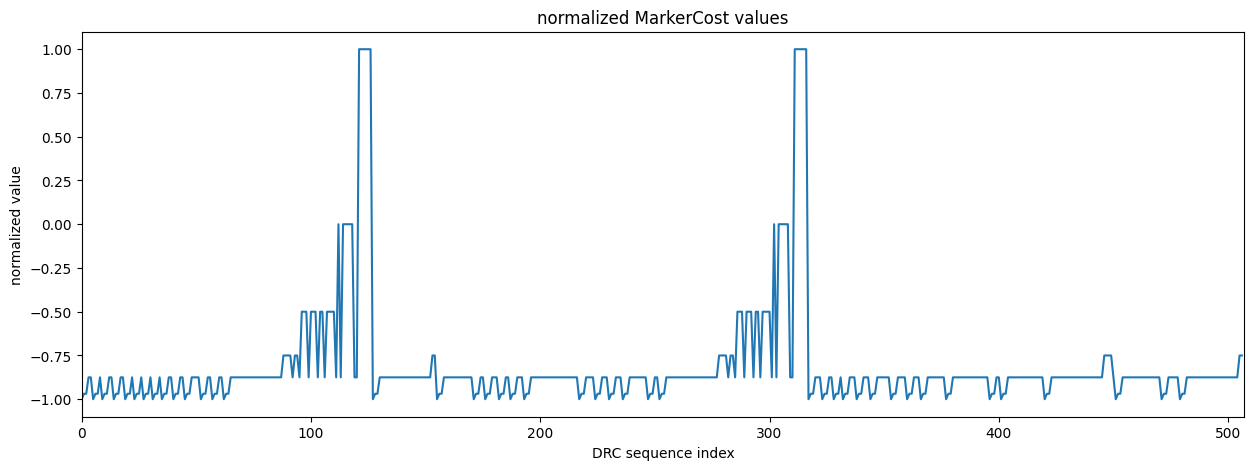

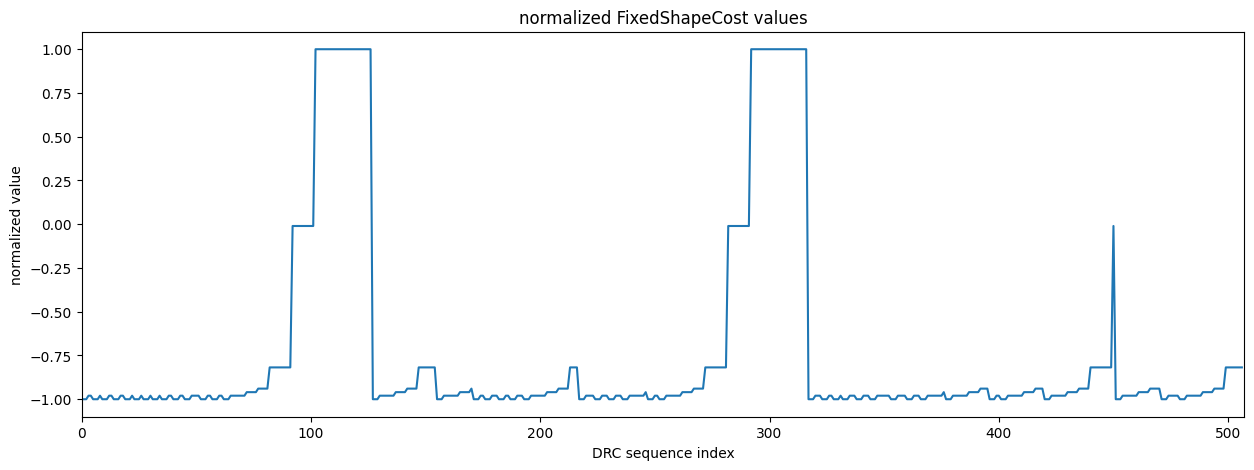

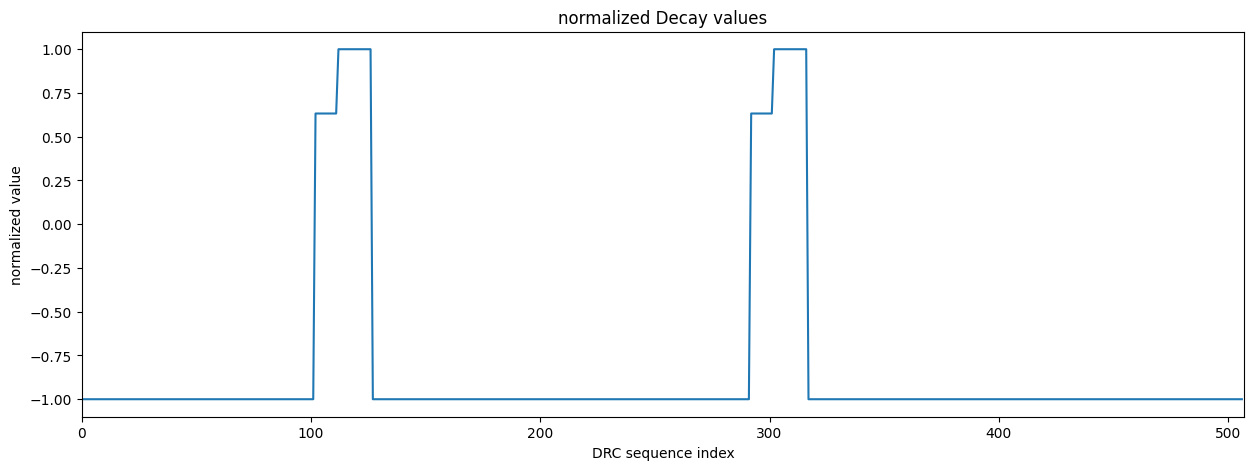

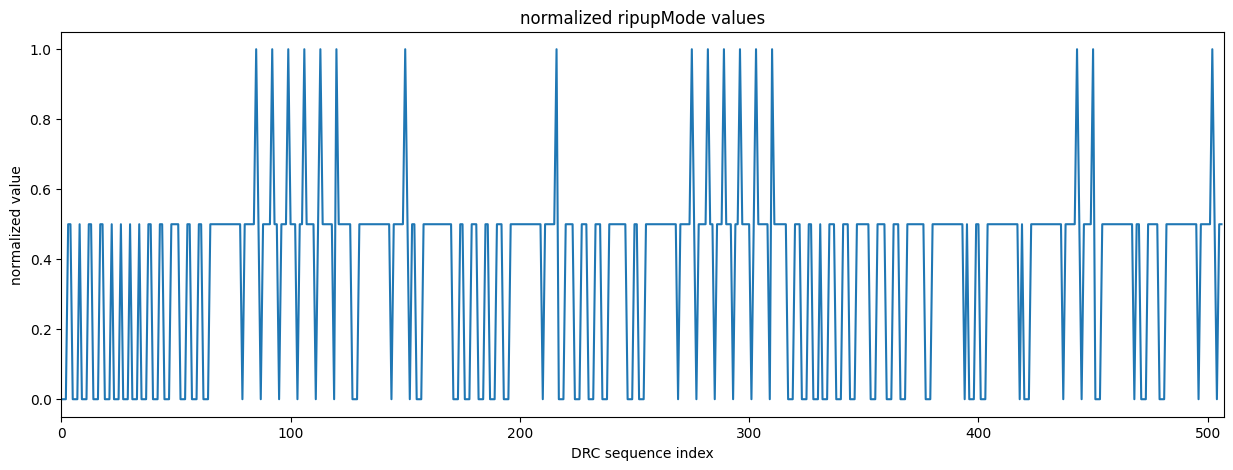

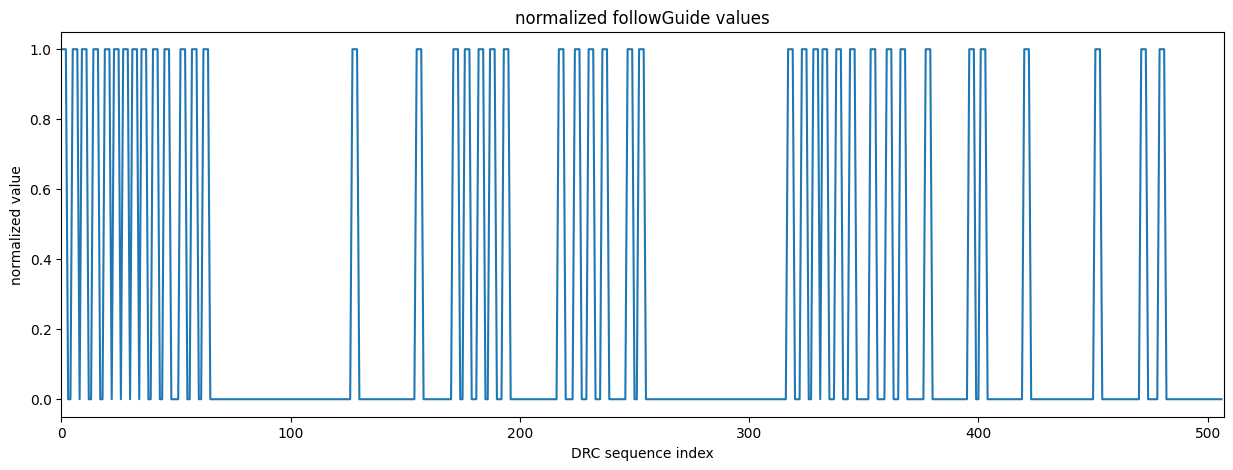

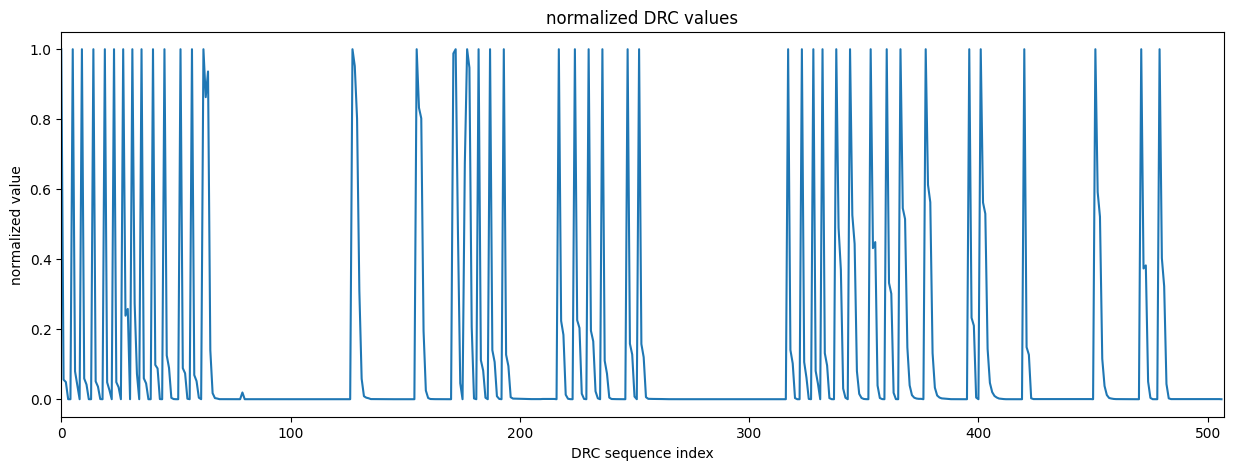

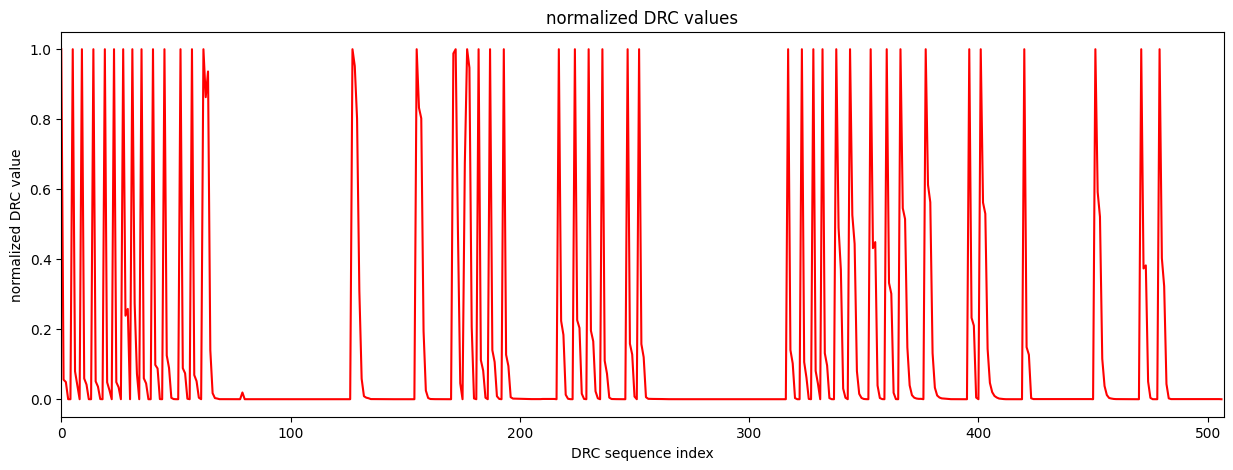

In [23]:
for column in df.columns:
    plt.figure(figsize=(15, 5));
    plt.plot(np.arange(len(df)), df[column])
    plt.title(f'normalized {column} values')
    plt.xlabel('DRC sequence index')
    plt.ylabel('normalized value')
    plt.xlim([0, len(df)])
    plt.show()
plt.figure(figsize=(15, 5));
plt.plot(np.arange(len(df)), df['DRC'], 'r')
plt.title(f'normalized DRC values')
plt.xlabel('DRC sequence index')
plt.ylabel('normalized DRC value')
plt.xlim([0, len(df)])
plt.show()

**split train and test sets**

In [24]:
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    df, df['DRC'], test_size=test_size, random_state=42, shuffle=False)

In [25]:
X_train.shape

(405, 9)

In [26]:
X_test.shape

(102, 9)

In [27]:
y_train.shape

(405,)

In [28]:
y_test.shape

(102,)

In [29]:
X_train.head(10)

,offset,mazeEndIter,DRCCost,MarkerCost,FixedShapeCost,Decay,ripupMode,followGuide,DRC
0,1.000000,-1.000000,-1.0,-1.00000,-1.000000,-1.0,0.0,1,1.000000
1,0.333333,-1.000000,-1.0,-0.96875,-1.000000,-1.0,0.0,1,0.055905
2,-0.666667,-1.000000,-1.0,-0.96875,-1.000000,-1.0,0.0,1,0.049027
3,1.000000,-0.836066,-1.0,-0.87500,-0.979798,-1.0,0.5,0,0.000098
4,0.666667,-0.836066,-1.0,-0.87500,-0.979798,-1.0,0.5,0,0.000000
65,1.000000,-1.000000,-1.0,-1.00000,-1.000000,-1.0,0.0,1,1.000000
66,0.333333,-1.000000,-1.0,-0.96875,-1.000000,-1.0,0.0,1,0.079646
67,-0.666667,-1.000000,-1.0,-0.96875,-1.000000,-1.0,0.0,1,0.039823
68,1.000000,-0.836066,-1.0,-0.87500,-0.979798,-1.0,0.5,0,0.000000
130,1.000000,-1.000000,-1.0,-1.00000,-1.000000,-1.0,0.0,1,1.000000


In [30]:
y_train

0       1.000000
1       0.055905
2       0.049027
3       0.000098
4       0.000000
          ...   
2409    0.000000
2470    1.000000
2471    0.561841
2472    0.529939
2473    0.143783
Name: DRC, Length: 405, dtype: float64

**normalize data**

In [31]:
# from sklearn.preprocessing import MinMaxScaler

# # function for min-max normalization of stock
# def normalize_data(data):
#     # instantiate scalers
#     sc = MinMaxScaler(feature_range=(-1, 1))
#     data_scaled = sc.fit_transform(data)

#     return data_scaled, sc

In [32]:
# X_train_norm, _ = normalize_data(X_train)
# y_train_norm, _ = normalize_data(y_train)

In [33]:
# X_train_norm.shape

**window sliding**

In [34]:
X_train.shape[1]

9

In [35]:
# convert train_norm to a tensor
X_train = X_train.to_numpy()
X_train = torch.FloatTensor(X_train).view((-1, X_train.shape[1]))
y_train = y_train.to_numpy()
y_train = torch.FloatTensor(y_train).view(-1)

In [36]:
X_train.shape

torch.Size([405, 9])

In [37]:
# define a function to create sequence/label tuples
def input_data(dataX,datay,ws):
    out = []
    L = len(dataX)
    for i in range(L-ws):
        window = dataX[i:i+ws]
        label = datay[i+ws:i+ws+1]
        coeff = dataX[i+ws][:-1]
        out.append((window, coeff, label))
    return out

In [38]:
# define a window size
window_size = 2
# apply X_train_norm and y_train_norm to get window sliding results
train = input_data(X_train, y_train, window_size)

In [39]:
len(train)

403

In [40]:
X_train[0:4]

tensor([[ 1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00,  0.0000e+00,  1.0000e+00,  1.0000e+00],
        [ 3.3333e-01, -1.0000e+00, -1.0000e+00, -9.6875e-01, -1.0000e+00,
         -1.0000e+00,  0.0000e+00,  1.0000e+00,  5.5905e-02],
        [-6.6667e-01, -1.0000e+00, -1.0000e+00, -9.6875e-01, -1.0000e+00,
         -1.0000e+00,  0.0000e+00,  1.0000e+00,  4.9027e-02],
        [ 1.0000e+00, -8.3607e-01, -1.0000e+00, -8.7500e-01, -9.7980e-01,
         -1.0000e+00,  5.0000e-01,  0.0000e+00,  9.8251e-05]])

In [41]:
train[0]

(tensor([[ 1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  0.0000,  1.0000,
           1.0000],
         [ 0.3333, -1.0000, -1.0000, -0.9688, -1.0000, -1.0000,  0.0000,  1.0000,
           0.0559]]),
 tensor([-0.6667, -1.0000, -1.0000, -0.9688, -1.0000, -1.0000,  0.0000,  1.0000]),
 tensor([0.0490]))

In [42]:
train[1]

(tensor([[ 0.3333, -1.0000, -1.0000, -0.9688, -1.0000, -1.0000,  0.0000,  1.0000,
           0.0559],
         [-0.6667, -1.0000, -1.0000, -0.9688, -1.0000, -1.0000,  0.0000,  1.0000,
           0.0490]]),
 tensor([ 1.0000, -0.8361, -1.0000, -0.8750, -0.9798, -1.0000,  0.5000,  0.0000]),
 tensor([9.8251e-05]))

In [43]:
print(f"time series intput shape: {train[0][0].shape}")
print(f"current timestemp coefficient shape: {train[0][1].shape}")
print(f"label shape: {train[0][2].shape}")

time series intput shape: torch.Size([2, 9])
current timestemp coefficient shape: torch.Size([8])
label shape: torch.Size([1])


# 4. Model and validate data <a class="anchor" id="4-bullet"></a> 

In [44]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Dropout

In [45]:
# print(keras.__version__)

In [46]:
# # reference: https://medium.com/mlearning-ai/multivariate-time-series-forecasting-using-rnn-lstm-8d840f3f9aa7
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(20, 4)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(Dense(1))

In [47]:
# epoch = 100
# batch = 32
# lr = 1e-3
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
#               loss=keras.losses.MeanSquaredError())
# model.fit(X_train_shape, y_train, epochs=epoch, batch_size=batch)

In [48]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=9, seq_len=2, coeff_size=8, hidden_size=10,
                 output_size=1,num_layers=2,dropout=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.seq_len = seq_len
        self.coeff_size = coeff_size
        
        # add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size, 
                            num_layers=num_layers, dropout=dropout)
        
        # add a fully-connected layer:
        self.linear = nn.Linear(hidden_size * self.seq_len + self.coeff_size, output_size)
        
        # initializing h0 and c0:
        self.hidden = (torch.zeros(num_layers,self.hidden_size),
                       torch.zeros(num_layers,self.hidden_size))

    def forward(self, seq, coeff):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),-1), self.hidden)
        
        data = torch.cat((lstm_out.view(self.seq_len * self.hidden_size), 
                                      coeff.view(self.coeff_size)), 0)

        pred = self.linear(data)
        
        return pred[-1]

**instantiation, loss, and optimizer**

In [49]:
torch.manual_seed(42)

# instantiate
seq_len, input_size = train[0][0].shape
coeff_size = train[0][1].shape[0]
hidden_size = 10
output_size = 1
num_layers = 2
dropout = 0.2
batch_size = 1

model = LSTMnetwork(input_size=input_size, seq_len=seq_len, coeff_size=coeff_size, hidden_size=hidden_size,
                     output_size=output_size, num_layers=num_layers, dropout=dropout)

# loss
criterion = nn.MSELoss()

#optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

model

LSTMnetwork(
  (lstm): LSTM(9, 10, num_layers=2, dropout=0.2)
  (linear): Linear(in_features=28, out_features=1, bias=True)
)

**training**

In [50]:
epochs = 100

import time
start_time = time.time()

loss_list = []
for epoch in range(epochs):
    for seq, coeff, y_train in train:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(num_layers, model.hidden_size),
                        torch.zeros(num_layers, model.hidden_size))
        
        y_pred = model(seq, coeff)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    loss_list.append(loss.item())
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

/home/jborg/Data/Research/DLPnR/DL-code-for-detailed-routing/env/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  1 Loss: 0.00012012
Epoch:  2 Loss: 0.00004239
Epoch:  3 Loss: 0.00271225
Epoch:  4 Loss: 0.01064376
Epoch:  5 Loss: 0.02222786
Epoch:  6 Loss: 0.02491086
Epoch:  7 Loss: 0.03319141
Epoch:  8 Loss: 0.03821907
Epoch:  9 Loss: 0.02648397
Epoch: 10 Loss: 0.03539048
Epoch: 11 Loss: 0.02277819
Epoch: 12 Loss: 0.02458792
Epoch: 13 Loss: 0.01634250
Epoch: 14 Loss: 0.03049031
Epoch: 15 Loss: 0.02675555
Epoch: 16 Loss: 0.01917397
Epoch: 17 Loss: 0.00381593
Epoch: 18 Loss: 0.02652687
Epoch: 19 Loss: 0.01889972
Epoch: 20 Loss: 0.00944497
Epoch: 21 Loss: 0.00528454
Epoch: 22 Loss: 0.01567203
Epoch: 23 Loss: 0.00465934
Epoch: 24 Loss: 0.00648574
Epoch: 25 Loss: 0.00124822
Epoch: 26 Loss: 0.00650028
Epoch: 27 Loss: 0.01365922
Epoch: 28 Loss: 0.00348068
Epoch: 29 Loss: 0.04687513
Epoch: 30 Loss: 0.00101867
Epoch: 31 Loss: 0.00942336
Epoch: 32 Loss: 0.00483296
Epoch: 33 Loss: 0.00098249
Epoch: 34 Loss: 0.00063926
Epoch: 35 Loss: 0.00267750
Epoch: 36 Loss: 0.00304399
Epoch: 37 Loss: 0.01483029
E

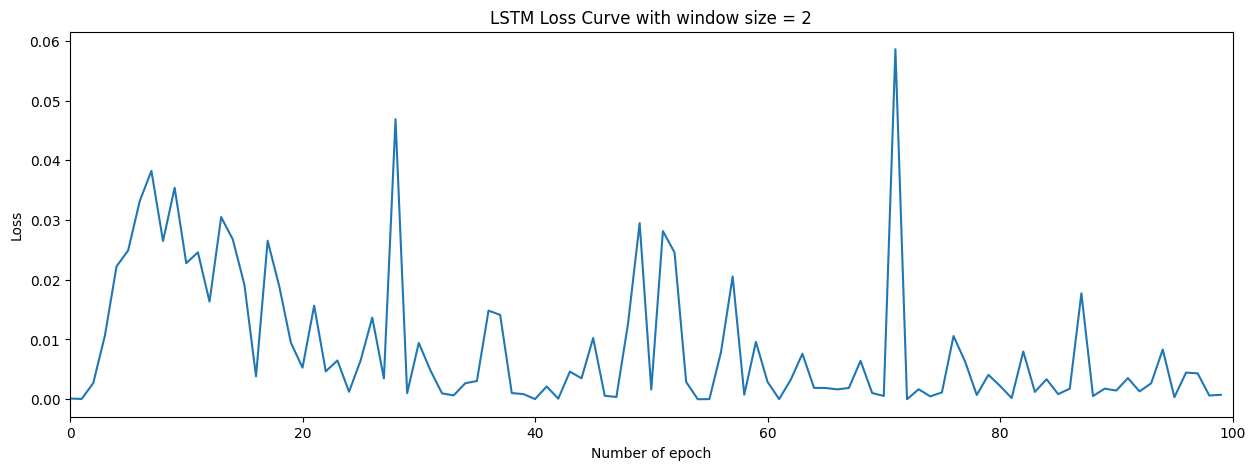

In [51]:
# visualization loss 
plt.figure(figsize=(15, 5));
plt.plot(list(range(len(loss_list))),loss_list)
plt.xlabel("Number of epoch")
plt.xlim([0, epochs])
plt.ylabel("Loss")
plt.title(f"LSTM Loss Curve with window size = {window_size}")
plt.show()

# 5. Predictions <a class="anchor" id="5-bullet"></a> 

**test set normalization**

In [52]:
# X_test_norm, scaler_X_test = normalize_data(X_test)
# y_test_norm, scaler_y_test = normalize_data(y_test)

**test set window sliding**

In [53]:
# convert train_norm to a tensor
X_test = X_test.to_numpy()
X_test = torch.FloatTensor(X_test).view((-1, X_test.shape[1]))
y_test = y_test.to_numpy()
y_test = torch.FloatTensor(y_test).view(-1)

In [54]:
# apply X_train_norm and y_train_norm to get window sliding results
test = input_data(X_test, y_test, window_size)

**test set prediction**

In [55]:
testset_size = len(test)

preds = []

model.eval()

for i in range(testset_size):
    seq = test[i][0]
    coeff = test[i][1]
    with torch.no_grad():
        model.hidden = (torch.zeros(num_layers,model.hidden_size),
                        torch.zeros(num_layers,model.hidden_size))
        preds.append(model(seq, coeff).item())

preds = np.array(preds).reshape(len(preds), -1)

In [56]:
len(preds)

100

In [57]:
len(y_test[window_size:])

100

**inverting the normalized values**

In [58]:
# true_predictions = scaler_y_test.inverse_transform(np.array(preds).reshape(-1, 1))
# true_predictions

In [59]:
X_test.shape

torch.Size([102, 9])

In [60]:
y_test

tensor([4.6633e-02, 2.0255e-02, 9.3400e-03, 4.7698e-03, 1.9301e-03, 1.1536e-03,
        4.4370e-04, 6.6556e-05, 6.6556e-05, 6.6556e-05, 6.6556e-05, 6.6556e-05,
        2.2185e-05, 8.8741e-05, 0.0000e+00, 1.0000e+00, 1.4871e-01, 1.2703e-01,
        2.7594e-03, 3.9421e-04, 3.9421e-04, 3.9421e-04, 3.9421e-04, 3.9421e-04,
        3.9421e-04, 3.9421e-04, 3.9421e-04, 3.9421e-04, 3.9421e-04, 3.9421e-04,
        3.9421e-04, 3.9421e-04, 3.9421e-04, 3.9421e-04, 3.9421e-04, 3.9421e-04,
        3.9421e-04, 3.9421e-04, 3.9421e-04, 3.9421e-04, 3.9421e-04, 3.9421e-04,
        3.9421e-04, 3.9421e-04, 3.9421e-04, 0.0000e+00, 1.0000e+00, 5.9195e-01,
        5.2131e-01, 1.1553e-01, 3.7726e-02, 1.1931e-02, 3.5226e-03, 1.9317e-03,
        7.9542e-04, 3.4090e-04, 3.0302e-04, 3.0302e-04, 1.5151e-04, 1.5151e-04,
        1.5151e-04, 1.1363e-04, 1.1363e-04, 1.1363e-04, 7.5755e-05, 0.0000e+00,
        1.0000e+00, 3.7352e-01, 3.8236e-01, 5.0397e-02, 3.7914e-03, 1.0730e-04,
        7.1536e-05, 0.0000e+00, 1.0000e+

**plotting**

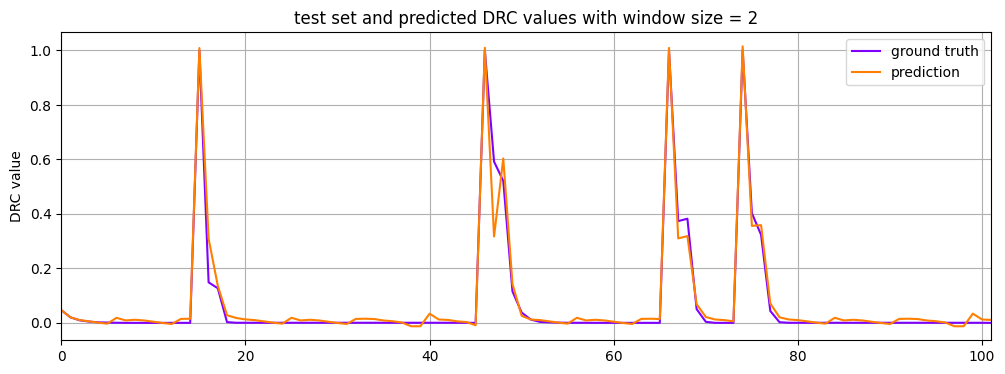

In [61]:
fig = plt.figure(figsize=(12,4))
x = np.arange(X_test.shape[0])
plt.title(f'test set and predicted DRC values with window size = {window_size}')
plt.ylabel('DRC value')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
# fig.autofmt_xdate()

# predict = np.vstack((np.zeros(window_size).reshape(-1, 1), true_predictions))
predict = np.vstack((np.array(X_test[:window_size, -1]).reshape(-1, 1), preds))
plt.plot(x, np.array(X_test[:, -1]), color='#8000ff', label='ground truth')
plt.plot(x, predict, color='#ff8000', label='prediction')
plt.legend()
plt.show()

In [62]:
# save residual data for model performance comparison
data = np.array(X_test[:, -1]).reshape(predict.shape) - predict
data = data.reshape(len(data))
dataf = pd.DataFrame(data)
dataf.to_csv("prediction residual for window size = " + str(window_size) + ".csv", columns=None)

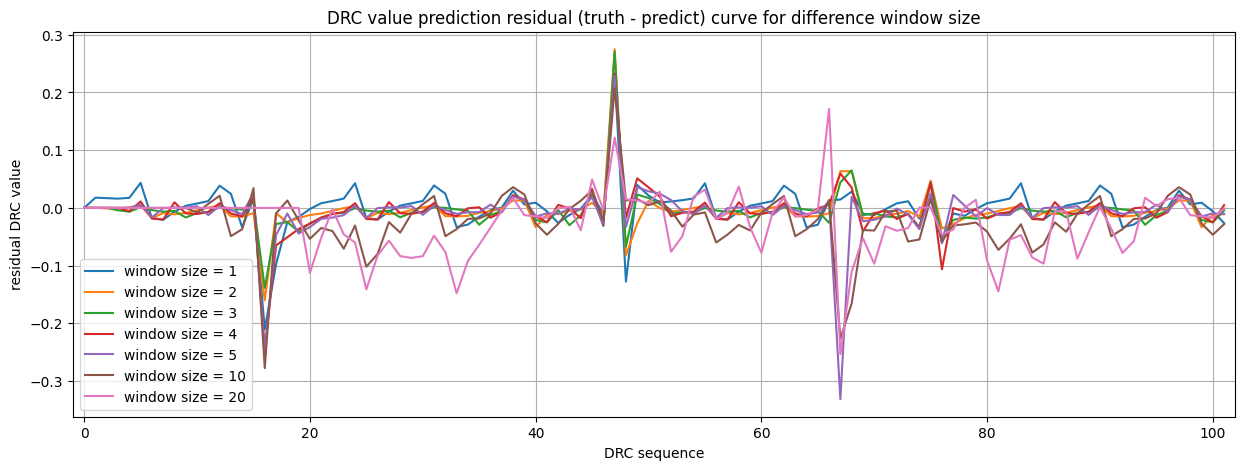

In [63]:
sizeData = [1, 2, 3, 4, 5, 10, 20]
plt.figure(figsize=(15, 5));
for s in sizeData:
    dataf = pd.read_csv("./prediction residual for window size = " + str(s) + ".csv")
    plt.plot(dataf.iloc[:, 1].values, label="window size = " + str(s))
plt.title('DRC value prediction residual (truth - predict) curve for difference window size')
plt.xlabel('DRC sequence')
plt.ylabel('residual DRC value')
plt.xlim([-1, len(dataf)])
# plt.ylim([-0.1, 0.1])
plt.grid()
plt.legend()
plt.show()

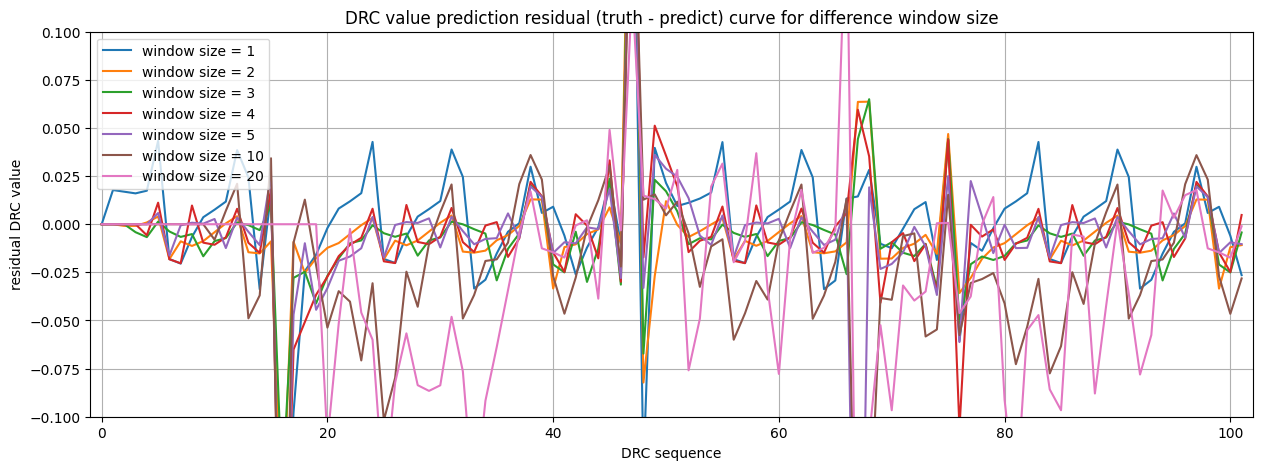

In [64]:
sizeData = [1, 2, 3, 4, 5, 10, 20]
plt.figure(figsize=(15, 5));
for s in sizeData:
    dataf = pd.read_csv("./prediction residual for window size = " + str(s) + ".csv")
    plt.plot(dataf.iloc[:, 1].values, label="window size = " + str(s))
plt.title('DRC value prediction residual (truth - predict) curve for difference window size')
plt.xlabel('DRC sequence')
plt.ylabel('residual DRC value')
plt.xlim([-1, len(dataf)])
plt.ylim([-0.1, 0.1])
plt.grid()
plt.legend()
plt.show()

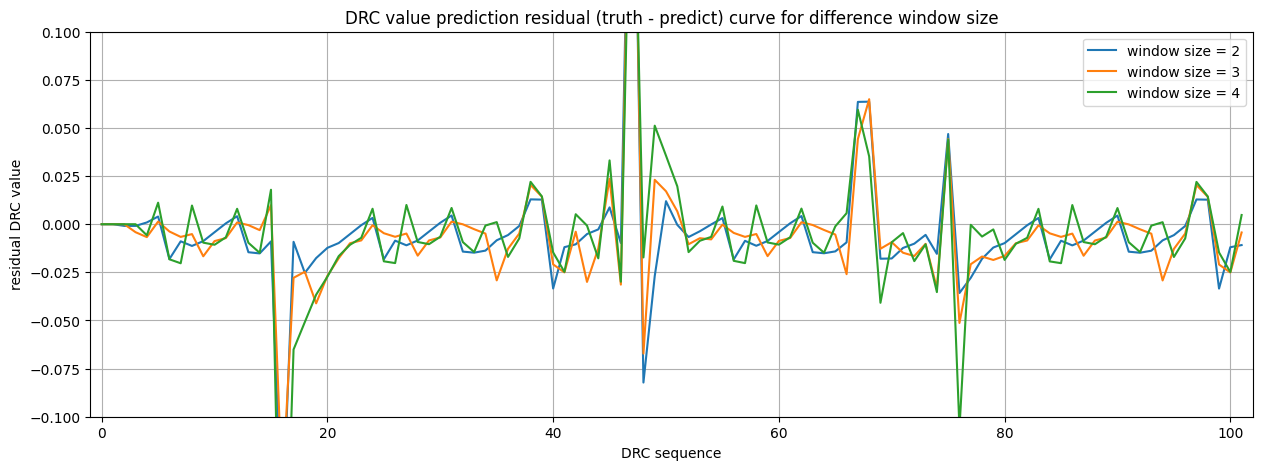

In [65]:
sizeData = [2, 3, 4]
plt.figure(figsize=(15, 5));
for s in sizeData:
    dataf = pd.read_csv("./prediction residual for window size = " + str(s) + ".csv")
    plt.plot(dataf.iloc[:, 1].values, label="window size = " + str(s))
plt.title('DRC value prediction residual (truth - predict) curve for difference window size')
plt.xlabel('DRC sequence')
plt.ylabel('residual DRC value')
plt.xlim([-1, len(dataf)])
plt.ylim([-0.1, 0.1])
plt.grid()
plt.legend()
plt.show()

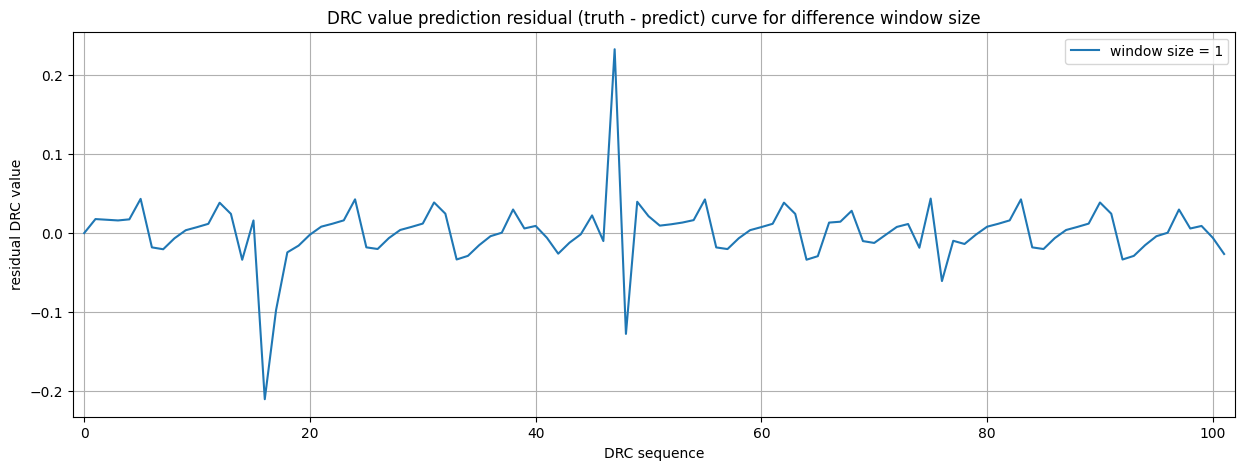

In [66]:
plt.figure(figsize=(15, 5));
dataf = pd.read_csv("./prediction residual for window size = " + str(1) + ".csv")
plt.plot(dataf.iloc[:, 1].values, label="window size = " + str(1))
plt.title('DRC value prediction residual (truth - predict) curve for difference window size')
plt.xlabel('DRC sequence')
plt.ylabel('residual DRC value')
plt.xlim([-1, len(dataf)])
# plt.ylim([-0.1, 0.1])
plt.grid()
plt.legend()
plt.show()